<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

# Part 3 of 4

# Contents: 
Part 1: Data Collection 

- Webscrapping Subreddit Tea

- Webscrapping Subreddit Coffee

- Summary

Part 2: EDA and Data Cleaning

- Tea

- Coffee

- Initial Identification of Top Words

- Compare Lemmatization and Stemming

- Summary

Part 3: Modelling and Model Evaluation

-[Base Model](#Base_Model)

-[CVEC with Logistic Regression](#cveclr)

-[TFIDF with Logistic Regression](#tveclr)

-[CVEC with Naive Bayes](#cvecnb)

-[TFIDF with Naive Bayes](#tvecnb)

-[CVEC with Random Forest](#cvecrf)

-[TFIDF with Random Forest](#tvecrf)

Part 4: Sentiment Analysis, Recommendation and Conclusion

In [34]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV # split our data and run hyperparameter search
from sklearn.pipeline import Pipeline # to compactly pack multiple modeling operations
from sklearn.naive_bayes import MultinomialNB # to build our classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix # to access results from binary classification task (you may also import other specific classification metrics)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# from sklearn.svm import LinearSVC, SVC

In [3]:
# import csv
df = pd.read_csv('./data/df_export.csv')

# Check DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24926 entries, 0 to 24925
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      24926 non-null  int64 
 1   title          24926 non-null  object
 2   stemmed_title  24871 non-null  object
dtypes: int64(1), object(2)
memory usage: 584.3+ KB


In [5]:
df.loc[df['stemmed_title'].isnull() , :]

,subreddit,title,stemmed_title
113,1,what is this on my tea,NaN
645,1,what tea is that,NaN
1946,1,☕,NaN
2260,1,tea,NaN
2646,1,that is a no,NaN
3124,1,the tea🍵,NaN
4267,1,it is what it is,NaN
4427,1,tea,NaN
6382,1,as above so below,NaN
6938,1,is this tea,NaN


In [6]:
df.dropna(subset=['stemmed_title'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24871 entries, 0 to 24925
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      24871 non-null  int64 
 1   title          24871 non-null  object
 2   stemmed_title  24871 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.2+ KB


In [8]:
# Prepare X and y - note that X is not a dataframe as CountVectorizer and TF-IDF cannot accept that 
X = df['stemmed_title'] 
y = df['subreddit']

In [9]:
y.value_counts(normalize = True)

0    0.531261
1    0.468739
Name: subreddit, dtype: float64

In [10]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

# Modelling

<a id="Base_Model"></a>
## Base Model with CountVector and Logistic Regression
- Without hyparameters tuning

In [10]:
basepipe = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('lr', LogisticRegression(random_state=42)) # tuple for estimator object, class
])

In [11]:
basepipe.fit(X_train, y_train)

D:\Desmond\Mamba\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cvec', CountVectorizer()),
                ('lr', LogisticRegression(random_state=42))])

In [13]:
# Score model on training set.
basepipe.score(X_train, y_train)

0.9624917481846006

In [14]:
# Score model on testing set.
basepipe.score(X_test, y_test)

0.8803606237816765

<a id="cveclr"></a>
## CountVectorizer with Logistic Regression

In [10]:
pipe_cvec_lr = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('lr', LogisticRegression(random_state=42)) # tuple for estimator object, class
])

In [11]:
pipe_params_cvec_lr = {
    'cvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)], # test unigram only (1,1) and unigram+bigram (1,2)
    'lr__max_iter':[10000],
    'lr__penalty': ['l2']
} # standard param dict definition for GridSearch CV

In [12]:
# Instantiate GridSearchCV.

gs_cvec_lr = GridSearchCV(pipe_cvec_lr, # the object that we are optimizing
                  param_grid=pipe_params_cvec_lr, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [13]:
pipe_cvec_lr.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()),
  ('lr', LogisticRegression(random_state=42))],
 'verbose': False,
 'cvec': CountVectorizer(),
 'lr': LogisticRegression(random_state=42),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 '

In [14]:
# Fit GridSearch to training data.
gs_cvec_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__max_iter': [10000], 'lr__penalty': ['l2']})

In [15]:
gs_cvec_lr.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'lr__max_iter': 10000,
 'lr__penalty': 'l2'}

In [16]:
print(gs_cvec_lr.best_score_)

0.8751718869365928


In [17]:
# Score model on training set.
gs_cvec_lr.score(X_train, y_train)

0.9402868631098842

In [18]:
# Score model on testing set.
gs_cvec_lr.score(X_test, y_test)

0.878411306042885

<a id="tveclr"></a>
## TF-IDF with Logistic Regression

In [19]:
pipe_tvec_lr = Pipeline([
    ('tvec', TfidfVectorizer()), # this is the old change vs our previous GridSearch done with CountVectorizer()
    ('lr', LogisticRegression(random_state=42))
])

In [20]:
pipe_tvec_lr.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()),
  ('lr', LogisticRegression(random_state=42))],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'lr': LogisticRegression(random_state=42),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__pe

In [21]:
pipe_params_tvec_lr = {
    'tvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)], # test unigram only (1,1) and unigram+bigram (1,2)
    'lr__max_iter':[10000],
    'lr__penalty': ['l2']
} # standard param dict definition for GridSearch CV

In [22]:
# Instantiate GridSearchCV.

gs_tvec_lr = GridSearchCV(pipe_tvec_lr, # the object that we are optimizing
                  param_grid=pipe_params_tvec_lr, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [23]:
# Fit GridSearch to training data.
gs_tvec_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__max_iter': [10000], 'lr__penalty': ['l2'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [24]:
gs_tvec_lr.best_params_ 

{'lr__max_iter': 10000,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [25]:
print(gs_tvec_lr.best_score_)

0.8813528471694709


In [26]:
# Score model on training set.
gs_tvec_lr.score(X_train, y_train)

0.9247434435575826

In [27]:
# Score model on testing set.
gs_tvec_lr.score(X_test, y_test)

0.8846247563352827

## TF-IDF with Logistic Regression
- Further tuning (However this did not return better results)

In [11]:
pipe_tvec_lr_2 = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('lr', LogisticRegression(random_state=42))
])

In [12]:
pipe_tvec_lr_2.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()),
  ('lr', LogisticRegression(random_state=42))],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'lr': LogisticRegression(random_state=42),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__pe

In [17]:
pipe_params_tvec_lr_2 = {
    'tvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)], # test unigram only (1,1) and unigram+bigram (1,2)
    'lr__max_iter':[10000],
    'lr__penalty': ['l2', 'l1'], # further tuning using l1 and elasticnet
    'lr__solver': ['liblinear'],
    'lr__C': [0.001, 0.01, 1, 10] 
} # standard param dict definition for GridSearch CV

In [18]:
# Instantiate GridSearchCV.

gs_tvec_lr_2 = GridSearchCV(pipe_tvec_lr_2, # the object that we are optimizing
                  param_grid=pipe_params_tvec_lr_2, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [19]:
%%time

# Fit GridSearch to training data.
gs_tvec_lr_2.fit(X_train, y_train)

CPU times: total: 24min 4s
Wall time: 24min 14s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__C': [0.001, 0.01, 1, 10], 'lr__max_iter': [10000],
                         'lr__penalty': ['l2', 'l1'],
                         'lr__solver': ['liblinear'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [20]:
gs_tvec_lr_2.best_params_ 

{'lr__C': 1,
 'lr__max_iter': 10000,
 'lr__penalty': 'l2',
 'lr__solver': 'liblinear',
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 1)}

In [21]:
print(gs_tvec_lr_2.best_score_)

0.8813527751334558


In [22]:
# Score model on training set.
gs_tvec_lr_2.score(X_train, y_train)

0.9252235491808197

In [23]:
# Score model on testing set.
gs_tvec_lr_2.score(X_test, y_test)

0.8847465886939572

In [24]:
pd.DataFrame(gs_tvec_lr_2.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__max_iter,param_lr__penalty,param_lr__solver,param_tvec__max_df,param_tvec__max_features,...,param_tvec__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
106,0.593801,0.024191,0.139106,0.025707,1,10000,l2,liblinear,0.9,4000,...,"(1, 1)","{'lr__C': 1, 'lr__max_iter': 10000, 'lr__penal...",0.887789,0.891389,0.883588,0.873649,0.870348,0.881353,0.008094,1
118,0.577421,0.032597,0.114590,0.006646,1,10000,l2,liblinear,0.95,4000,...,"(1, 1)","{'lr__C': 1, 'lr__max_iter': 10000, 'lr__penal...",0.887789,0.891389,0.883588,0.873649,0.870348,0.881353,0.008094,1
116,0.596087,0.062634,0.123533,0.011689,1,10000,l2,liblinear,0.95,4000,...,"(1, 1)","{'lr__C': 1, 'lr__max_iter': 10000, 'lr__penal...",0.886889,0.891089,0.883588,0.874250,0.870648,0.881293,0.007687,3
104,0.588457,0.025384,0.113335,0.008493,1,10000,l2,liblinear,0.9,4000,...,"(1, 1)","{'lr__C': 1, 'lr__max_iter': 10000, 'lr__penal...",0.886889,0.891089,0.883588,0.874250,0.870648,0.881293,0.007687,3
112,0.588223,0.019443,0.116537,0.009005,1,10000,l2,liblinear,0.95,3000,...,"(1, 1)","{'lr__C': 1, 'lr__max_iter': 10000, 'lr__penal...",0.886289,0.888689,0.880288,0.872749,0.867947,0.879192,0.007870,5


In [25]:
y_pred_tvec_lr = gs_tvec_lr_2.predict(X_test)

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tvec_lr).ravel()
print(tn, fp, fn, tp)

3855 506 440 3407


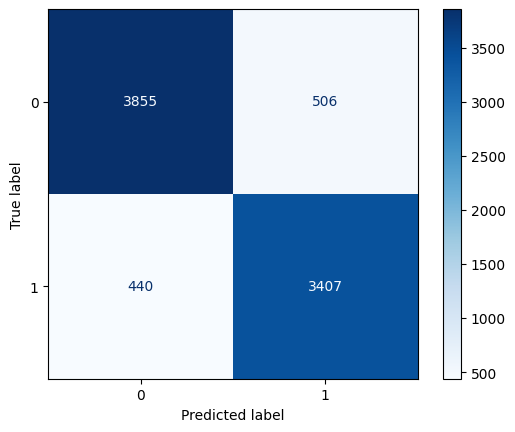

In [35]:
plot_confusion_matrix(gs_tvec_lr_2, X_test, y_test, cmap='Blues', values_format='d');

<a id="cvecnb"></a>
## CountVectorizer with Naive Bayes

In [15]:
pipe_cvec_nb = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('nb', MultinomialNB()) # tuple for estimator object, class
])

In [16]:
pipe_params_cvec_nb = {
    'cvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)] # test unigram only (1,1) and unigram+bigram (1,2)
} # standard param dict definition for GridSearch CV

In [18]:
# Instantiate GridSearchCV.

gs_cvec_nb = GridSearchCV(pipe_cvec_nb, # the object that we are optimizing
                  param_grid=pipe_params_cvec_nb, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [19]:
# Fit GridSearch to training data.
gs_cvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [20]:
gs_cvec_nb.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [22]:
print(gs_cvec_nb.best_score_)

0.8710913348237586


In [23]:
# Score model on training set.
gs_cvec_nb.score(X_train, y_train)

0.8835743863650003

In [24]:
# Score model on testing set.
gs_cvec_nb.score(X_test, y_test)

0.8672027290448343

In [40]:
pd.DataFrame(gs_cvec_nb.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cvec__max_df,param_cvec__max_features,param_cvec__min_df,param_cvec__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.397936,0.059913,0.083975,0.000746,0.95,4000,2,"(1, 1)","{'cvec__max_df': 0.95, 'cvec__max_features': 4...",0.872787,0.872187,0.873387,0.869748,0.867347,0.871091,0.002244,1
8,0.400723,0.023847,0.091758,0.005095,0.9,4000,2,"(1, 1)","{'cvec__max_df': 0.9, 'cvec__max_features': 40...",0.872787,0.872187,0.873387,0.869748,0.867347,0.871091,0.002244,1
22,0.394937,0.025727,0.094944,0.013926,0.95,4000,3,"(1, 1)","{'cvec__max_df': 0.95, 'cvec__max_features': 4...",0.873087,0.872187,0.872787,0.868848,0.866747,0.870731,0.002503,3
10,0.406903,0.032986,0.089958,0.001706,0.9,4000,3,"(1, 1)","{'cvec__max_df': 0.9, 'cvec__max_features': 40...",0.873087,0.872187,0.872787,0.868848,0.866747,0.870731,0.002503,3
4,0.428054,0.042570,0.112485,0.027467,0.9,3000,2,"(1, 1)","{'cvec__max_df': 0.9, 'cvec__max_features': 30...",0.868887,0.870687,0.870687,0.865546,0.868247,0.868811,0.001899,5


In [67]:
y_pred_cvec_nb = gs_cvec_nb.predict(X_test)

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cvec_nb).ravel()
print(tn, fp, fn, tp)

3734 627 463 3384


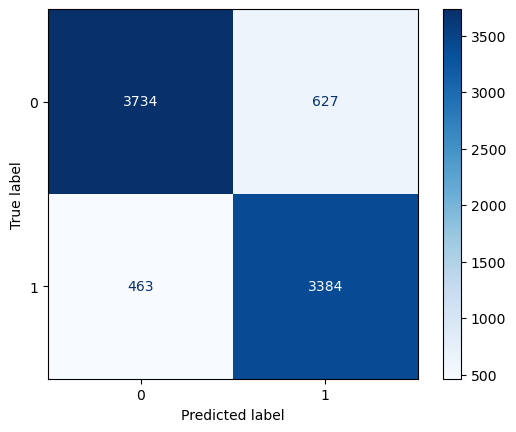

In [69]:
ConfusionMatrixDisplay.from_estimator(gs_cvec_nb, X_test, y_test, cmap='Blues', values_format='d');

In [ ]:
# alternative code to plot confusion matrix depending on sklearn version
plot_confusion_matrix(gs_cvec_nb, X_test, y_test, cmap='Blues', values_format='d');

<a id="tvecnb"></a>
## TF-IDF with Naive Bayes

In [25]:
# Set up a pipeline with tf-idf vectorizer and multinomial naive bayes

pipe_tvec_nb = Pipeline([
    ('tvec', TfidfVectorizer()), # this is the old change vs our previous GridSearch done with CountVectorizer()
    ('nb', MultinomialNB())
])

In [32]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_tvec_params_nb = {
    'tvec__max_features': [2_000, 3_000, 4_000],
    'tvec__stop_words': [None, 'english'], # let's try both with and without stopwords
    'tvec__ngram_range': [(1,1), (1,2)] # let's try both unigrams and uni+bi-grams
}

In [33]:
# Instantiate GridSearchCV.
gs_tvec_nb = GridSearchCV(pipe_tvec_nb, # what object are we optimizing?
                        param_grid = pipe_tvec_params_nb, # what parameters values are we searching?
                        cv=5, n_jobs=-1) # 5-fold cross-validation. n_jobs=-1 will do GridSearch using all cores in our CPU to accelerate the search

In [34]:
# Fit GridSearch to training data.
gs_tvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [2000, 3000, 4000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [35]:
# let's see what hyperparameter combination yielded the best result
gs_tvec_nb.best_params_ 

{'tvec__max_features': 4000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [38]:
print(gs_tvec_nb.best_score_)

0.8777523250524333


In [36]:
# Score model on training set.
gs_tvec_nb.score(X_train, y_train)

0.9015183340334874

In [37]:
# Score model on testing set.
gs_tvec_nb.score(X_test, y_test)

0.8756091617933723

In [39]:
pd.DataFrame(gs_tvec_nb.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tvec__max_features,param_tvec__ngram_range,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.984935,0.134704,0.212459,0.009785,4000,"(1, 1)",english,"{'tvec__max_features': 4000, 'tvec__ngram_rang...",0.881488,0.885689,0.879088,0.872749,0.869748,0.877752,0.005794,1
8,1.015369,0.204147,0.219575,0.037380,4000,"(1, 1)",None,"{'tvec__max_features': 4000, 'tvec__ngram_rang...",0.880288,0.881488,0.878488,0.873049,0.870648,0.876792,0.004217,2
5,0.942763,0.028893,0.217854,0.016869,3000,"(1, 1)",english,"{'tvec__max_features': 3000, 'tvec__ngram_rang...",0.879688,0.882088,0.876688,0.872449,0.868247,0.875832,0.004974,3
10,3.087659,0.064507,0.392051,0.070913,4000,"(1, 2)",None,"{'tvec__max_features': 4000, 'tvec__ngram_rang...",0.879688,0.882388,0.877588,0.865846,0.873349,0.875772,0.005776,4
11,2.672597,0.424996,0.285221,0.102061,4000,"(1, 2)",english,"{'tvec__max_features': 4000, 'tvec__ngram_rang...",0.877888,0.880888,0.878188,0.869748,0.871549,0.875652,0.004255,5


In [56]:
y_pred_tvec_nb = gs_tvec_nb.predict(X_test)

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tvec_nb).ravel()
print(tn, fp, fn, tp)

3966 395 626 3221


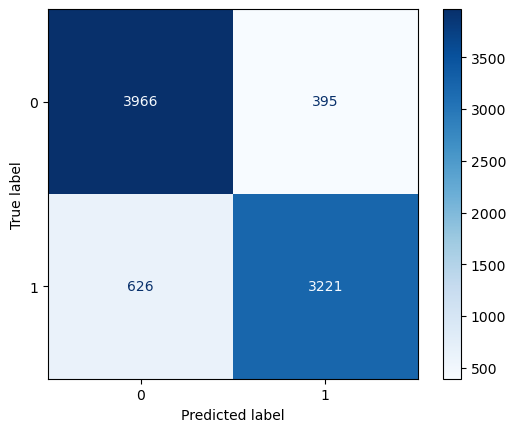

In [65]:
ConfusionMatrixDisplay.from_estimator(gs_tvec_nb, X_test, y_test, cmap='Blues', values_format='d');

In [ ]:
# alternative code to plot confusion matrix depending on sklearn version
plot_confusion_matrix(gs_tvec_nb, X_test, y_test, cmap='Blues', values_format='d');

<a id="cvecrf"></a>
## CountVectorizer with Random Forest

In [42]:
pipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('rf', RandomForestClassifier()) # tuple for estimator object, class
])

In [43]:
pipe_cvec_rf.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_est

In [44]:
pipe_params_cvec_rf = {
    'cvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)], # test unigram only (1,1) and unigram+bigram (1,2)
    'rf__n_estimators': [100, 150, 200], # iterating over different number of trees in the forest
    'rf__max_depth': [None, 1, 2, 3, 4, 5], # iterating over a defined set of max depth of tree. For None, the nodes are expanded until all leaves are pure
} # standard param dict definition for GridSearch CV

In [45]:
# Instantiate GridSearchCV.
gs_cvec_rf = GridSearchCV(pipe_cvec_rf,
                  param_grid=pipe_params_cvec_rf, 
                  cv=5) 

In [46]:
# Fit GridSearch to training data.
gs_cvec_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]})

In [47]:
gs_cvec_rf.best_params_ 

{'cvec__max_df': 0.95,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': None,
 'rf__n_estimators': 200}

In [48]:
print(gs_cvec_rf.best_score_)

0.8661098822967531


In [49]:
# Score model on training set.
gs_cvec_rf.score(X_train, y_train)

0.9917181779991598

In [50]:
# Score model on testing set.
gs_cvec_rf.score(X_test, y_test)

0.8725633528265108

In [51]:
y_pred_cvec_rf = gs_cvec_rf.predict(X_test)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cvec_rf).ravel()
print(tn, fp, fn, tp)

3884 477 569 3278


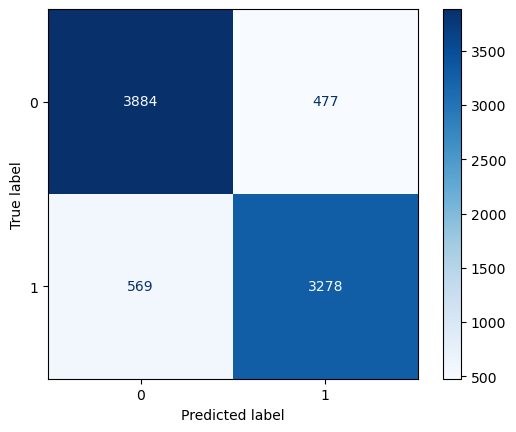

In [66]:
# View confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_cvec_rf, X_test, y_test, cmap='Blues', values_format='d');

In [ ]:
# alternative code to plot confusion matrix depending on sklearn version
plot_confusion_matrix(gs_cvec_rf, X_test, y_test, cmap='Blues', values_format='d');

<a id="tvecrf"></a>
## TF-IDF with Random Forest

In [10]:
pipe_tvec_rf = Pipeline([
    ('tvec', TfidfVectorizer()), # tuple for transformer object, class
    ('rf', RandomForestClassifier()) # tuple for estimator object, class
])

In [11]:
# pipe_tvec_rf.get_params()

In [12]:
pipe_params_tvec_rf = {
    'tvec__max_features': [2_000, 3_000, 4_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)], # test unigram only (1,1) and unigram+bigram (1,2)
    'rf__n_estimators': [100, 150, 200], # iterating over different number of trees in the forest
    'rf__max_depth': [1, 2, 3, 4, 5], # iterating over a defined set of max depth of tree. For None, the nodes are expanded until all leaves are pure
} # standard param dict definition for GridSearch CV

In [13]:
# Instantiate GridSearchCV.
gs_tvec_rf = GridSearchCV(pipe_tvec_rf,
                  param_grid=pipe_params_tvec_rf, 
                  cv=5) 

In [14]:
# Fit GridSearch to training data.
gs_tvec_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [15]:
gs_tvec_rf.best_params_ 

{'rf__max_depth': 5,
 'rf__n_estimators': 150,
 'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 1)}

In [16]:
print(gs_tvec_rf.best_score_)

0.8083172422884545


In [17]:
# Score model on training set.
gs_tvec_rf.score(X_train, y_train)

0.8106583448358639

In [18]:
# Score model on testing set.
gs_tvec_rf.score(X_test, y_test)

0.803849902534113

In [19]:
y_pred_tvec_rf = gs_tvec_rf.predict(X_test)

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tvec_rf).ravel()
print(tn, fp, fn, tp)

3531 830 780 3067


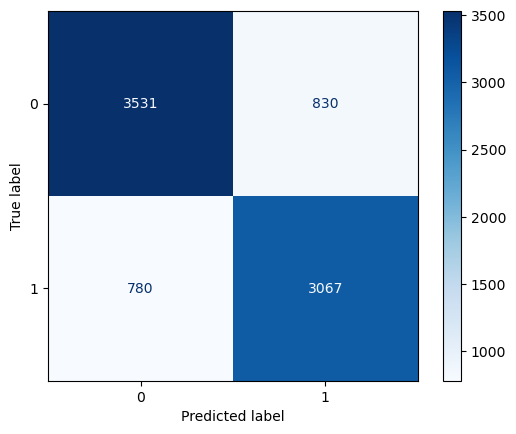

In [21]:
# View confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_tvec_rf, X_test, y_test, cmap='Blues', values_format='d');

In [ ]:
# alternative code to plot confusion matrix depending on sklearn version
plot_confusion_matrix(gs_tvec_rf, X_test, y_test, cmap='Blues', values_format='d');

<a id="Summary3"></a>
# Summary

|Model|Train Accuracy Score|Test Accuracy Score|
|-----|---------------|--------------|
|Base CVEC Logistic Regression|0.9625|0.8803|
|CVEC Logistic Regression|0.9402|0.8784|
|TVEC Logistic Regression|0.9247|0.8846|
|CVEC Naive Bayes|0.8835|0.8672|
|TVEC Naive Bayes|0.9015|0.8756|
|CVEC Random Forest|0.9917|0.8725|
|TVEC Random Forest|0.8106|0.8038|

Logistic Regression with TF-IDF returned the best results amongst the models trained and tested, with a score of 0.8846, meaning that 88% of the future posts fed to the model would be predicted correctly. Most models have minimal overfitting except for base model where no hyperparameter tunings were done and Random Forest where overfitting results in a poor model. 